Programmer: Xavier Barinaga  

This is my project to explore my Spotify Data and to see what Spotify Wrapped missed

In [1]:
import pandas as pd
import json
import utils

json_df_1 = pd.read_json("StreamingHistory_music_1.json")

# Introduction

I am working with my Spotify data, although this is a common data set to use I feel there are many unique you can do with it. I wanted to see what spotify missed. The data set I am getting is in JSON including the API calls I make. The data I am using is just streaming history and data of my playlists. I have to combine my streaming history as it is in multiple parts due to the 20000+ instances. The API calls I make are for each unique artist or song. 

The attributes include: 

* `endTime`: timestamp when the track finished playing
* `artistName`: name of the artist
* `trackName`: name of the track
* `msPlayed`: how many milliseconds were played
* `trackId`: unique ID for the track
* `artistPopularity`: popularity score of the artist
* `popularity`: popularity score of the track
* `explicit`: 1 if explicit content, 0 otherwise
* `duration_ms`: total track duration in milliseconds
* `portion_played`: `msPlayed / duration_ms` — percent of track played

The attribute I am trying to classify is the portion_played. With the classification, I wanted to see how much of a song I listen to. I created this column on my own as a way to turn my ms_played into a categorical and scaled attribute. The impact on my results will sort of show me the tendencies I have when listening to music. Possible companies and marketers could use data like mine to better algorithms to keep people listening to their music app more often. 


The data I am working with has no missing values off the bat. But as I add attributes I will have to account for possible missing values.

In [ ]:
json_df_1 = utils.filter_non_playlist_songs(json_df_1)

#utils.get_song_uri(json_df_1) became obsolete
#utils.get_artist_info(json_df_1)

track_uri_json = json.load(open("track_search_responses.json", "r"))

json_df_1_names = json_df_1["artistName"]

Number of Songs Before: 20578
Number of songs after: 17512


I chose to filter any instances of songs that were not in any of my playlists. I like to play random tracks like fart noises for a couple seconds so I wanted to use data from songs that I added to playlists. I also added the artists popularity and would have added genre but spotify only had genres for less than half of the artists, including many very large artists. I merged on track name, artist name, and end time depending on the data.

This data was very challenging to work with because I was trying to do so much with it but also because merging was difficult when adding so many attributes.

In [3]:
json_df_1.dropna()

json_df_1 = utils.add_track_id_to_df(json_df_1)

json_df_1 = utils.add_artist_pop_to_df(json_df_1)

json_df_1 = json_df_1.dropna()

Only a very few select songs (I believe 0 actually) did not properly get a trackUri so I decided to drop them.

In [4]:
non_repeat_tracks, non_repeat_track_artists = utils.get_nonrepeat_tracks(json_df_1)

#utils.get_song_features(json_df_1)

json_df_1 = pd.read_csv("merged.csv")

json_df_1 = json_df_1.dropna()

json_df_1 = utils.get_portion_played(json_df_1)

json_df_1 = json_df_1.drop_duplicates(subset=["endTime", "artistName", "trackName", "msPlayed"])

json_df_1["explicit"] = json_df_1["explicit"].astype(int)

json_df_1.to_csv("full_data.csv")

I seperated unique ID's into "bins" so I can get the 100 ids per API call.

A songs msPlayed can be longer than the song length if song is replayed or rewinded so portion_played can be greater than 1

Changed True/False to 1/0

In [5]:
print(json_df_1["explicit"].value_counts())

explicit
0    11924
1     4127
Name: count, dtype: int64


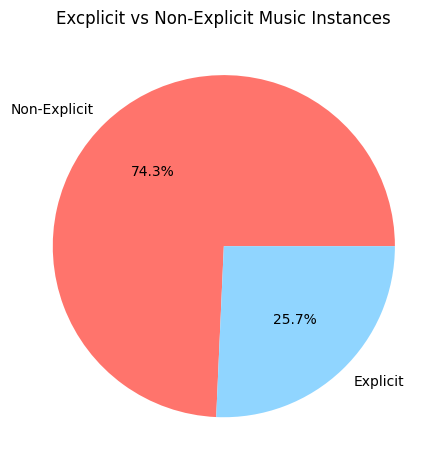

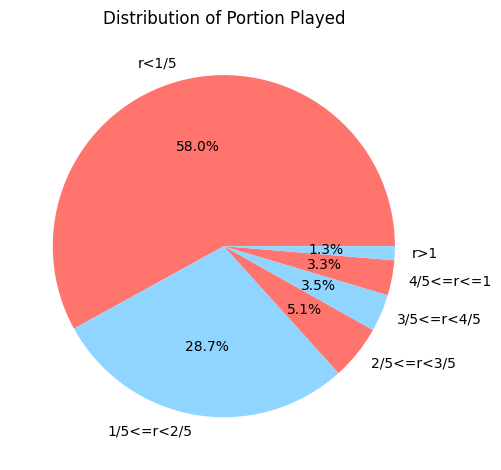

In [6]:
utils.pie_chart(json_df_1["explicit"], "Excplicit vs Non-Explicit Music Instances", ["Non-Explicit", "Explicit"])
utils.pie_chart(json_df_1["portion_played"], "Distribution of Portion Played", ["r<1/5", "1/5<=r<2/5", "2/5<=r<3/5", "3/5<=r<4/5", "4/5<=r<=1", "r>1"])


I wanted to see if I listen to non-explicit music more often, and sure enough it really looks like I listen to non-explicit about 3x as much.

Pie Chart 2 is showing the distribution of how much of a song I listen to. It seems that I really like to skips songs. I must be pretty picky.

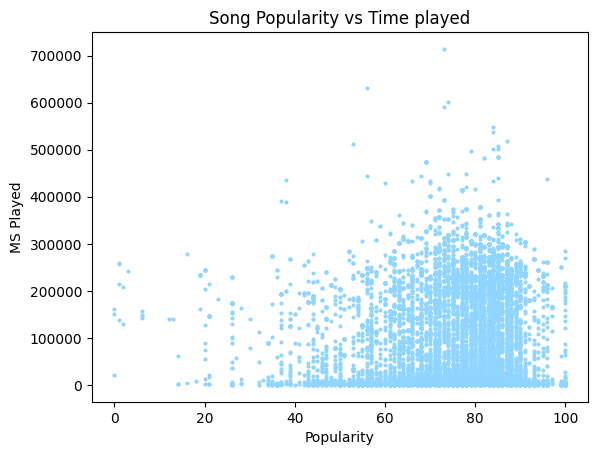

In [7]:
utils.scatter(json_df_1["popularity"], json_df_1["msPlayed"], "Song Popularity vs Time played", xlabel="Popularity", ylabel="MS Played")

It seems that I only really listen to more popular songs and you can kind of see that I listen to more popular songs a little more often each time.

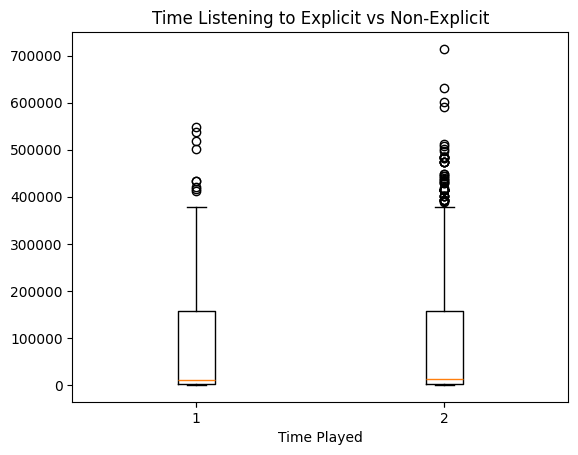

In [8]:
explicit_df = json_df_1.groupby("explicit").get_group(1)
non_explicit_df = json_df_1.groupby("explicit").get_group(0)
utils.box_plot(explicit_df["msPlayed"], non_explicit_df["msPlayed"], "Time Listening to Explicit vs Non-Explicit", "Time Played", labels=["Explicit", "Non-Explicit"])

This graph doesn't show very much of a difference in time played between explicit and non-explicit songs on average but I want to verify that.

## Hypothesis Test

I want to see if the average time I listen to explicit songs is higher than the average time I listen to less popular songs.

1. Identify the Null and Alternative Hypothesis

$H_0: \mu _{explicit} \geq \mu _{non-explicit}$  
$H_1: \mu _{explicit} < \mu _{non-explicit}$

1. Select the level of significance
   
$\alpha = 0.01$

3. Select the appropriate test statistic 
   
t-computed $= \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{ s_p^2 \frac{1}{n_1} + \frac{1}{n_2} }}$

4. Formulate the decision rule

If pvalue / 2 < $\alpha$ then we reject $H_0$ if not than we fail to reject $H_0$

In [9]:
utils.ms_hypothesis_test(json_df_1, significance=0.01, groupby="explicit", group=[0, 1])

pvalue:  0.4261527993264524
T-Statistic 0.18618420809965297
Failed to reject H0


5. Make the Decision

We fail to reject $H_0$ meaning there isn't a statistically significant difference between the mean of time listened to each song. Although it still shows a difference in the mean it's not enough to say I truly listen to Non-Explicit for longer.

## Hypothesis Test

I want to see if the average time I listen to Kanye is higher than Drake.

1. Identify the Null and Alternative Hypothesis

$H_0: \mu _{Drake} \geq \mu _{Kanye}$  
$H_1: \mu _{Drake} < \mu _{Kanye}$

1. Select the level of significance
   
$\alpha = 0.01$

3. Select the appropriate test statistic 
   
t-computed $= \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{ s_p^2 \frac{1}{n_1} + \frac{1}{n_2} }}$

4. Formulate the decision rule

If pvalue / 2 < $\alpha$ then we reject $H_0$ if not than we fail to reject $H_0$

In [10]:

json_df_1["artistName"] = json_df_1["artistName"].astype(str).str.strip()
kanye_ser, drake_ser = utils.get_artist_group(json_df_1)
utils.artist_ms_hypothesis_test(drake_ser, kanye_ser, significance=0.01,)


pvalue:  0.001618426575974514
T-Statistic 2.9589699303814414
Failed to reject H0


5. Make a Decision

My P-value is really low but my t-stat is very positive. So we fail to reject $H_0$This means that I actually listen to Drake for longer an average by a long shot. This is sort of surpising to me as Kanye was above Drake in my top artists.

# Classification

I am going to keep song duration as a category in the data that my classifiers will train on. This is because it doesn't cause leakage because the length of the song does not have any inherant correlation to the length I played it for. Also it might show if I like longer songs or not. To provide X, I Label encoded Arist Name and Track Name and I scaled the popularities and dropped the end time column.

I think my classifier might do poorly. This is because I feel that I don't follow much of a pattern when listening to music. I listen to whatever, whenever, and I go through completely different fazes of listening to music.

kNN Accuracy: 0.5983055071019188
Decision Tree Accuracy: 0.5337652628955893


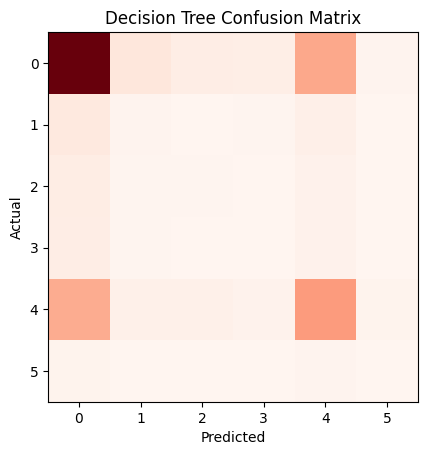

In [11]:
json_df_1 = utils.preprocessing(json_df_1)
print("kNN Accuracy:", utils.knn(json_df_1, 10))
print("Decision Tree Accuracy:", utils.decision_tree(json_df_1))


Thess are showing the matrix for kNN and for the decision tree of predicted vs actual classes. It clearly shows that it gets most of the skips right. Also I notice 4 is a particularly interesting category for it. The numbers correlate to $r > \frac{n}{5}$ with $y$ being the proportion of song that I listened to. I decide on not setting a max depth because my decision tree needs all the help it can get. 

The accuracies of the classifiers don't look like very good accuracy. But I believe they actually are, but for bad reasons. Keep in mind there are 6 categories it can choose from. So a purely random choice would give 1/6 accuracy on average. So ~60% is pretty good. What I noticed from the classifier accuracy, proportion pie graph, and matrices is really interesting. It appears that the classifiers really liked to pick $r<1/5$ because it knows I skip a lot. It was able to get an accuracy a few percent above just guessing skip every time. So it appears it just "lazily" picked skip for almost every prediction haha. There is not much of a difference between the kNN and Decision tree accuracy but I found the best accuracy with k=10.



In [12]:
corr_df = json_df_1.corr()
corr_df.style.background_gradient(cmap='bwr').format(precision=2)

,Unnamed: 0,artistName,trackName,msPlayed,artistPopularity,popularity,explicit,duration_ms,portion_played
Unnamed: 0,1.00,-0.00,-0.00,0.04,-0.16,-0.09,-0.11,-0.01,0.04
artistName,-0.00,1.00,0.01,-0.05,-0.18,-0.12,0.00,-0.16,0.02
trackName,-0.00,0.01,1.00,-0.03,-0.07,-0.07,0.02,-0.07,-0.00
msPlayed,0.04,-0.05,-0.03,1.00,-0.05,-0.01,-0.00,0.15,0.91
artistPopularity,-0.16,-0.18,-0.07,-0.05,1.00,0.67,0.23,0.25,-0.13
popularity,-0.09,-0.12,-0.07,-0.01,0.67,1.00,0.10,0.17,-0.07
explicit,-0.11,0.00,0.02,-0.00,0.23,0.10,1.00,0.06,-0.03
duration_ms,-0.01,-0.16,-0.07,0.15,0.25,0.17,0.06,1.00,-0.12
portion_played,0.04,0.02,-0.00,0.91,-0.13,-0.07,-0.03,-0.12,1.00


This heat map is to show that these categories didn't have much correlation with each other so it makes sense that the classifiers jsut want to choose skip on so many.

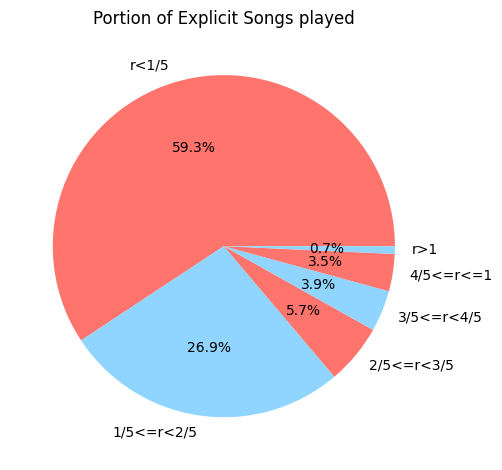

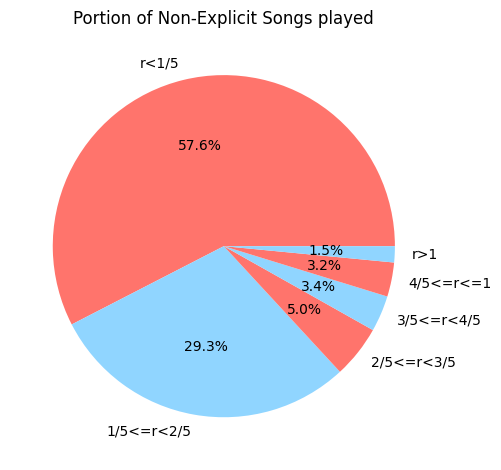

In [13]:
explicit_df = json_df_1.groupby("explicit").get_group(1)
non_explicit_df = json_df_1.groupby("explicit").get_group(0)
utils.pie_chart(explicit_df["portion_played"], "Portion of Explicit Songs played", ["r<1/5", "1/5<=r<2/5", "2/5<=r<3/5", "3/5<=r<4/5", "4/5<=r<=1", "r>1"])
utils.pie_chart(non_explicit_df["portion_played"], "Portion of Non-Explicit Songs played", ["r<1/5", "1/5<=r<2/5", "2/5<=r<3/5", "3/5<=r<4/5", "4/5<=r<=1", "r>1"])

#### Just some extra fun
I just wanted to further see if I skip explicit or non-explicit songs more. And it seems that I listen to a longer proportion of the non-explicit songs but only by a small margin.

Now I want to compare two artist, Drake and Kanye West

# Conclusion: 

I chose to add a good few attributes to my data in hope it would make it more interesting. I feel that it definitely added a few lens in which I could look through. When it came to the classifiers those attributes were clearly given little to none influence because of how much I LOVE TO SKIP SONGS. I think to improve I could have investigated the attributes on their own a little more to see more unique patterns.

The consequences of using this data for me is really nothing. I can play around with it and see some interesting tendencies that I have. But I think if someone else were to get a hold of my data and other peoples similar data then it could be a problem. They could exploit my patterns by tailoring specific algorithms to me to keep me listening. The funny thing is Spotify absolutely has the power to do this and it is totally possible that they have, are currently, or could be doing that.

Sources used:

My own Spotify Data  
Spotify Web API - From Spotify  
Stack Overflow - For small help in syntax or implementation  
ChatGPT - OpenAI - Used for small snipbits of help in fixing syntax, mostly used for brainstorming ideas to approach parts of the project.  
The Materials in this Course!
